# Unsupervised Learning

## Golub data set

In [1]:
suppressPackageStartupMessages(library(multtest))
suppressPackageStartupMessages(library(golubEsets))
suppressPackageStartupMessages(library(tidyverse))

In [2]:
data(Golub_Merge)
dim(Golub_Merge)

Features  Samples 
    7129       72

### Extract gene expression values

In [3]:
golub <- exprs(Golub_Merge)

There are 72 patients and 7192 probe sets.

In [4]:
dim(golub)

[1] 7129   72

In [5]:
head(golub)

,39,40,42,47,48,49,41,43,44,45,⋯,35,36,37,38,28,29,30,31,32,33
AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,-146,-187,⋯,7,-213,-25,-72,-4,15,-318,-32,-124,-135
AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,-74,-187,⋯,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,170,312,⋯,-57,136,124,-1,-125,2,-95,49,-37,-70
AFFX-BioC-5_at,328,295,276,182,266,24,142,252,174,142,⋯,132,318,325,392,241,193,312,230,330,337
AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,-32,114,⋯,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407
AFFX-BioDn-5_at,-427,-493,-250,-268,-326,-810,-284,-384,-318,-148,⋯,-478,-557,-464,-510,-411,-155,-344,-508,-423,-566


For this exercise, we consider the probe values to be variables and the patients to be observations, so it is convenient to work with the matrix transpose. 

In [6]:
golub <- t(golub)

In [7]:
dim(golub)

[1]   72 7129

In [8]:
golub[1:3, ]

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,⋯,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,⋯,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,⋯,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,⋯,413,399,16,558,24,893,297,6,1971,-42


## Distances

### Pairwise distance between first 3 patinets

In [9]:
dist(golub[1:3,])

          39        40
40 101530.75          
42  94405.04  89502.29

In [10]:
dist(golub[1:3,], diag = TRUE)

          39        40        42
39      0.00                    
40 101530.75      0.00          
42  94405.04  89502.29      0.00

In [11]:
dist(golub[1:3,], diag = TRUE, upper=TRUE)

          39        40        42
39      0.00 101530.75  94405.04
40 101530.75      0.00  89502.29
42  94405.04  89502.29      0.00

### Manual calculation

Euclidean distance is just the n-dimensional application of Pythagoras theorem.

If we have points $x = (0,0)$ and $y = (3, 4)$, then the distance between $x$ and $y$ is 

$$
\sqrt{(3-0)^2 + (4-0)^2} = 5
$$

We write a vectorized calculation of the above.

In [12]:
distance <- function(x, y) { sqrt(sum((x - y)^2))}

In [13]:
x <- golub[1,]
y <- golub[2,]
round(distance(x, y), 2)

[1] 101530.8

## Ordination

### MDS

In [14]:
mds <- as.data.frame(cmdscale(dist(golub), k = 2))

In [15]:
dim(mds)

[1] 72  2

In [16]:
phenotype <- Golub_Merge@phenoData@data$ALL.AML

In [17]:
mds <- mds %>% mutate(phenotype=phenotype)

In [18]:
head(mds)

V1,V2,phenotype
23228.24839,-10207.142,ALL
7327.10741,-8114.544,ALL
-5088.36719,-2548.717,ALL
46738.68452,-8792.756,ALL
-39906.71218,-23179.919,ALL
-37.91955,-9771.907,ALL


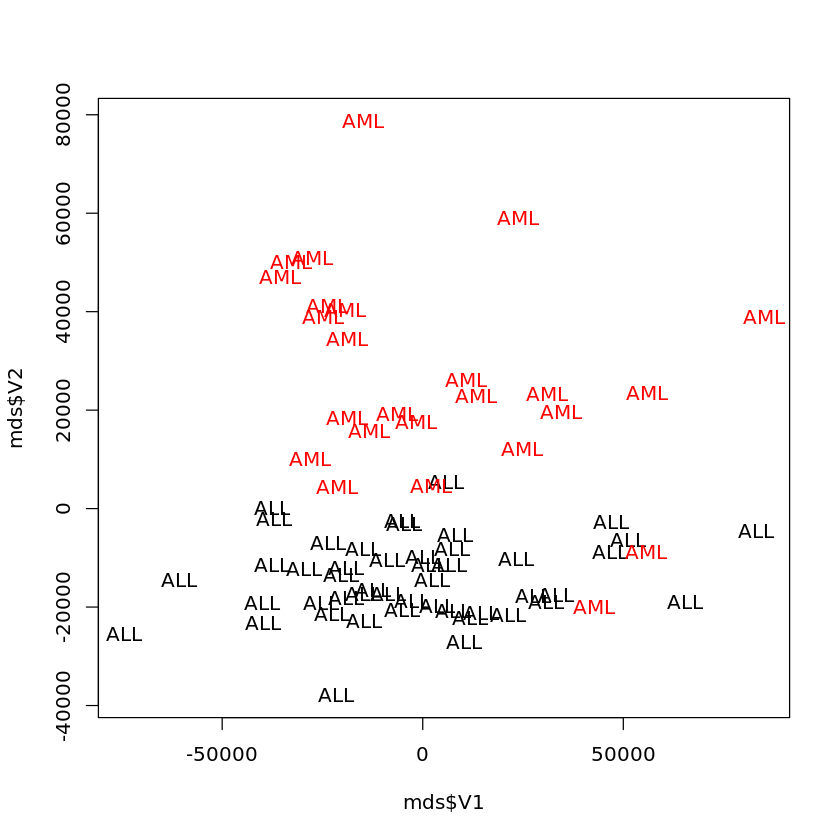

In [19]:
plot(mds$V1, mds$V2, type="n")
text(mds$V1, mds$V2, labels = mds$phenotype, col=as.integer(mds$phenotype))

### PCA

In [20]:
pca <- as.data.frame(prcomp(golub, center=TRUE, scale=TRUE, rank=2)$x)

In [21]:
dim(pca)

[1] 72  2

In [22]:
pca <- pca %>% mutate(phenotype=phenotype)

In [23]:
head(pca)

PC1,PC2,phenotype
-5.829016,18.985914,ALL
-8.364993,22.877479,ALL
12.928473,-3.996856,ALL
32.254056,-5.525024,ALL
-4.218081,-56.824360,ALL
-65.275849,22.817599,ALL


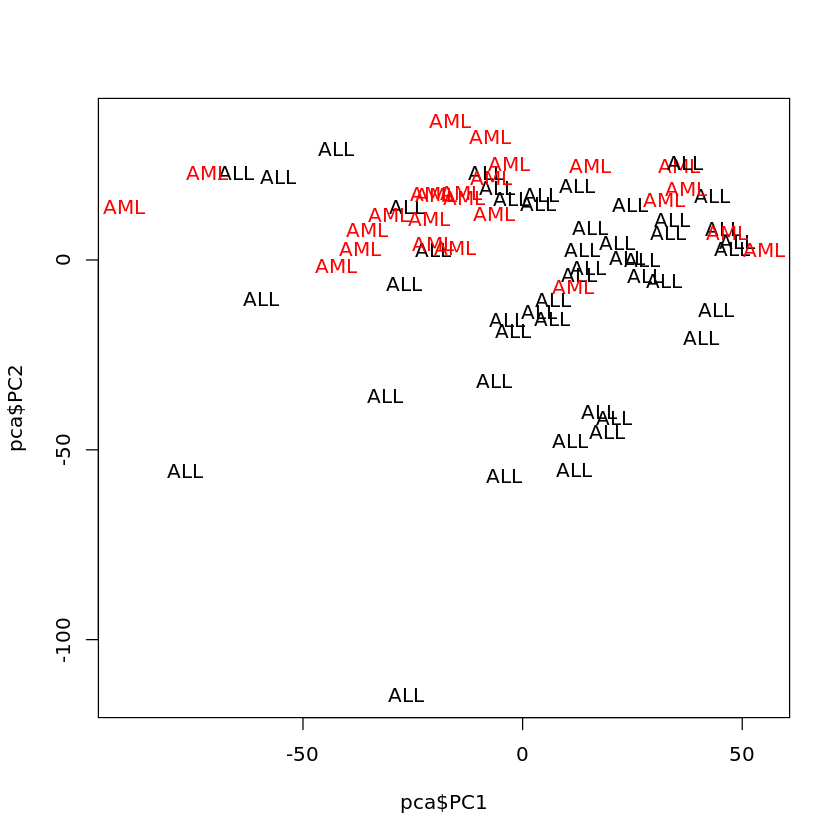

In [24]:
plot(pca$PC1, pca$PC2, type="n")
text(pca$PC1, pca$PC2, labels = pca$phenotype, col=as.integer(pca$phenotype))

## Preserving the distances

### Scale to have zero mean and unit standard deviation

In [25]:
scexpdat <- scale(golub)

In [26]:
dim(scexpdat)

[1]   72 7129

### Check 

In [27]:
apply(scexpdat[, 1:4], 2, mean)

AFFX-BioB-5_at AFFX-BioB-M_at AFFX-BioB-3_at AFFX-BioC-5_at 
 -7.841417e-17  -4.460287e-18   1.491832e-17  -5.051177e-17

In [28]:
apply(scexpdat[, 1:4], 2, sd)

AFFX-BioB-5_at AFFX-BioB-M_at AFFX-BioB-3_at AFFX-BioC-5_at 
             1              1              1              1

### Using `dplyr`

In [29]:
as.data.frame(scexpdat) %>% 
select(1:4) %>%
summarise_all(mean) %>%
round

AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at
0,0,0,0


In [30]:
as.data.frame(scexpdat) %>% 
select(1:4) %>%
summarise_all(sd) %>%
round

AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at
1,1,1,1


## Clustering

### Agglomerative hierarchical clustering (AHC)

In [31]:
names = c("ATL", "BOS", "ORD", "DCA")
airports <- c(0, 934, 585, 542, 934, 0, 853, 392, 
              585, 853, 0, 598, 542, 392, 598, 0)
airports <- matrix(airports, ncol=4, byrow=F, dimnames = list(names, names))

In [32]:
airports

,ATL,BOS,ORD,DCA
ATL,0,934,585,542
BOS,934,0,853,392
ORD,585,853,0,598
DCA,542,392,598,0


In [33]:
as.dist(airports)

    ATL BOS ORD
BOS 934        
ORD 585 853    
DCA 542 392 598

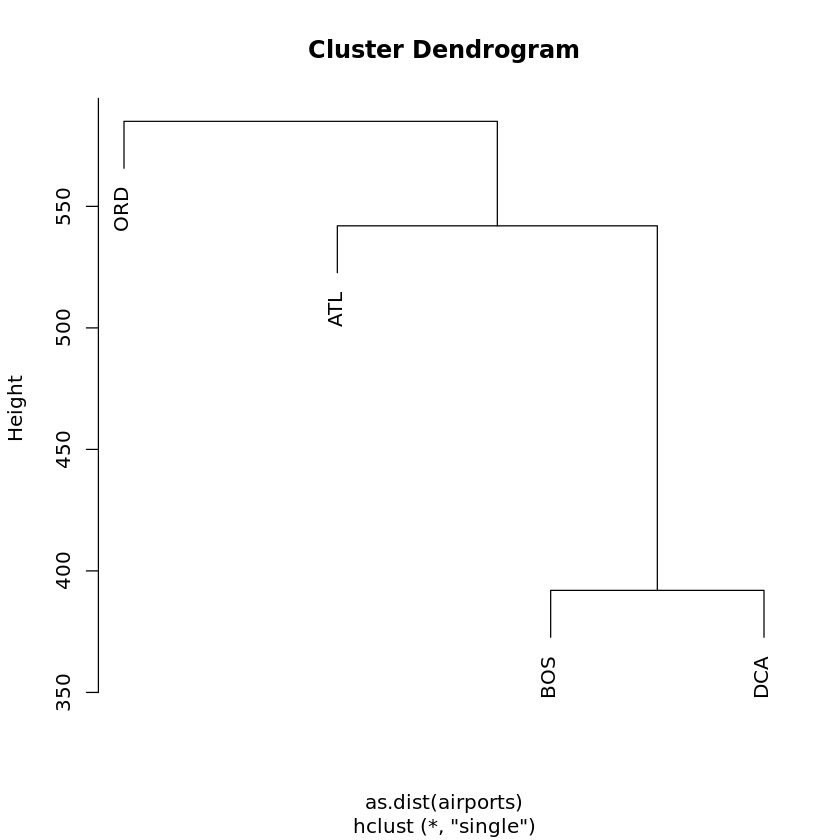

In [34]:
tree <- hclust(as.dist(airports), method="single")
plot(tree)

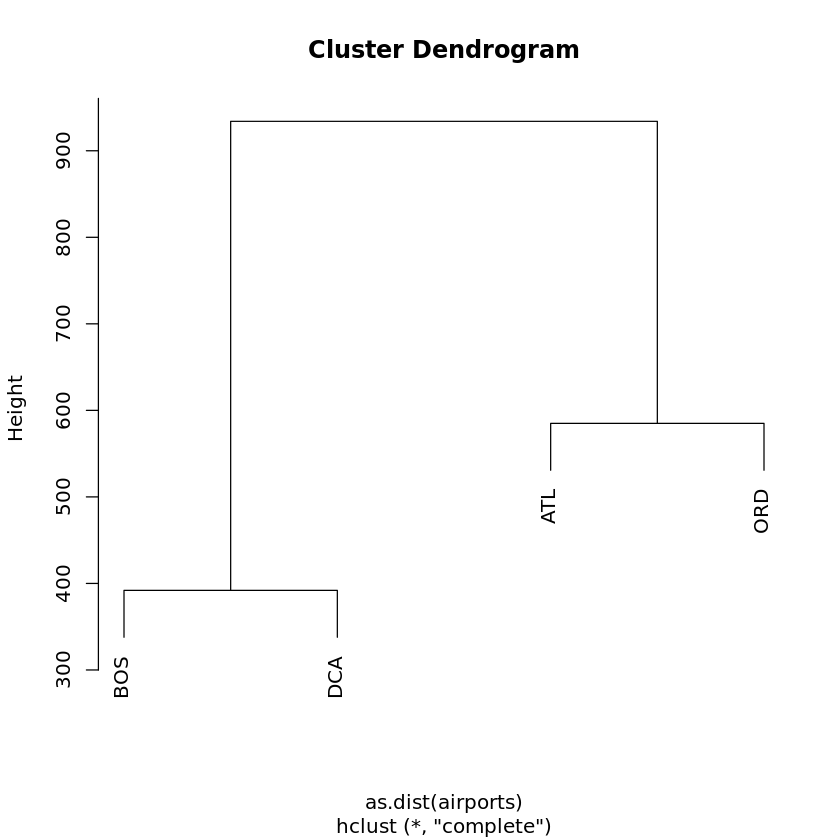

In [35]:
tree <- hclust(as.dist(airports), method="complete")
plot(tree)

### Road-trip USA

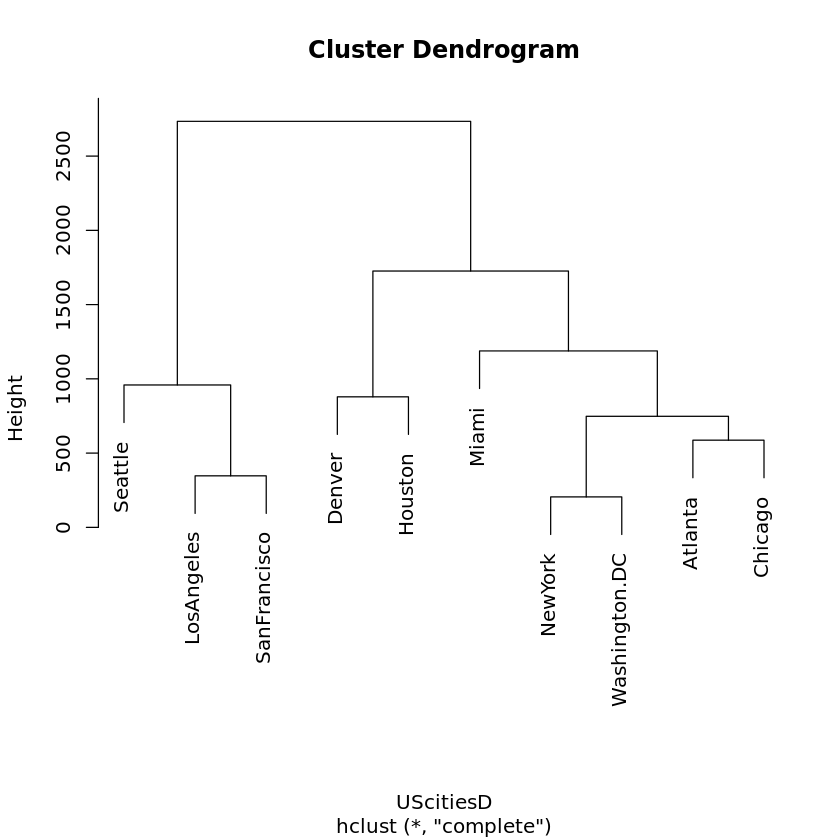

In [36]:
plot(hclust(UScitiesD, method="complete"))

### A trip to Europe

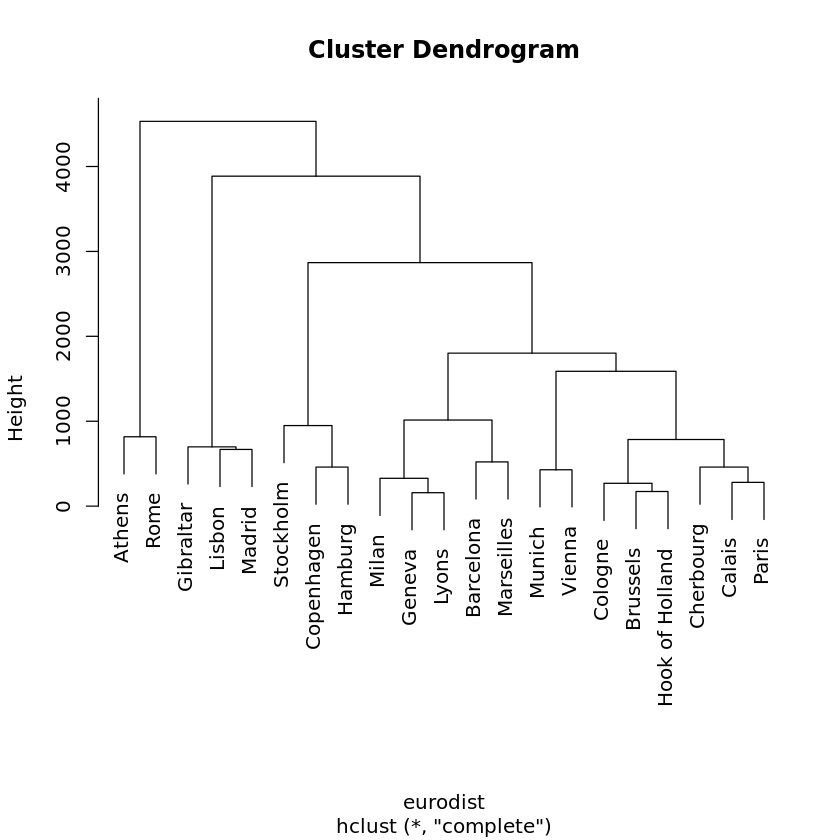

In [37]:
plot(hclust(eurodist, method="complete"))

In [38]:
eurotree <- hclust(eurodist, method="complete")

#### Find clusters by height

In [39]:
groups <- cutree(tree = eurotree, h = 1500)
data.frame(groups) %>% 
rownames_to_column("city") %>% 
arrange(groups)

city,groups
Athens,1
Rome,1
Barcelona,2
Geneva,2
Lyons,2
Marseilles,2
Milan,2
Brussels,3
Calais,3
Cherbourg,3


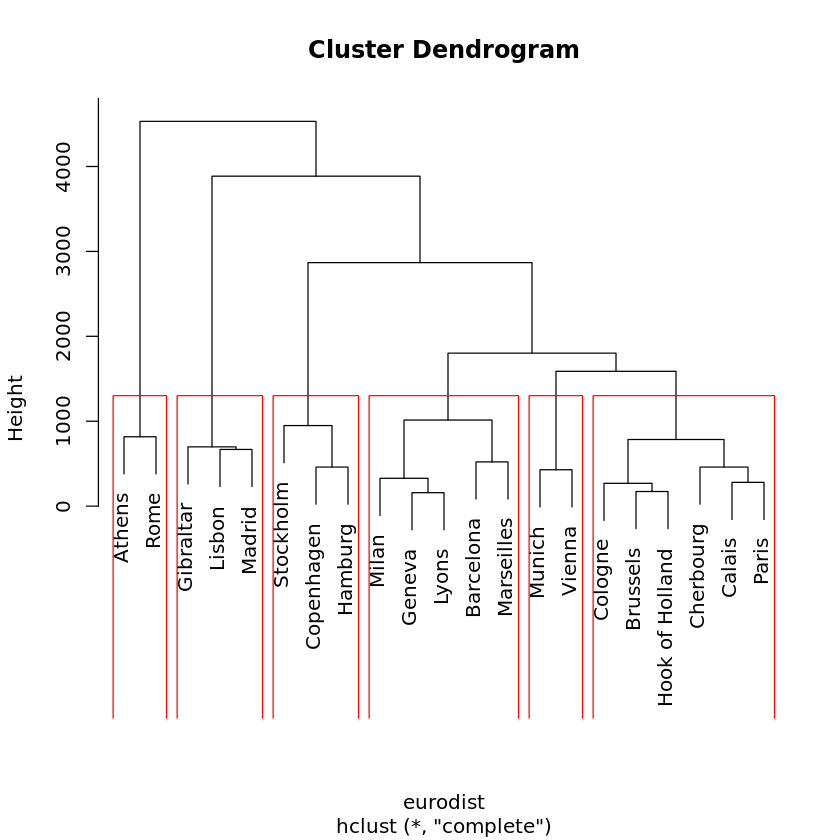

In [40]:
plot(eurotree)
rect.hclust(eurotree, h=1500, border = "red")

#### Find clusters by number

In [41]:
groups <- cutree(tree = eurotree, k = 8)
data.frame(groups) %>% 
rownames_to_column("city") %>% 
arrange(groups)

city,groups
Athens,1
Rome,1
Barcelona,2
Marseilles,2
Brussels,3
Calais,3
Cherbourg,3
Cologne,3
Hook of Holland,3
Paris,3


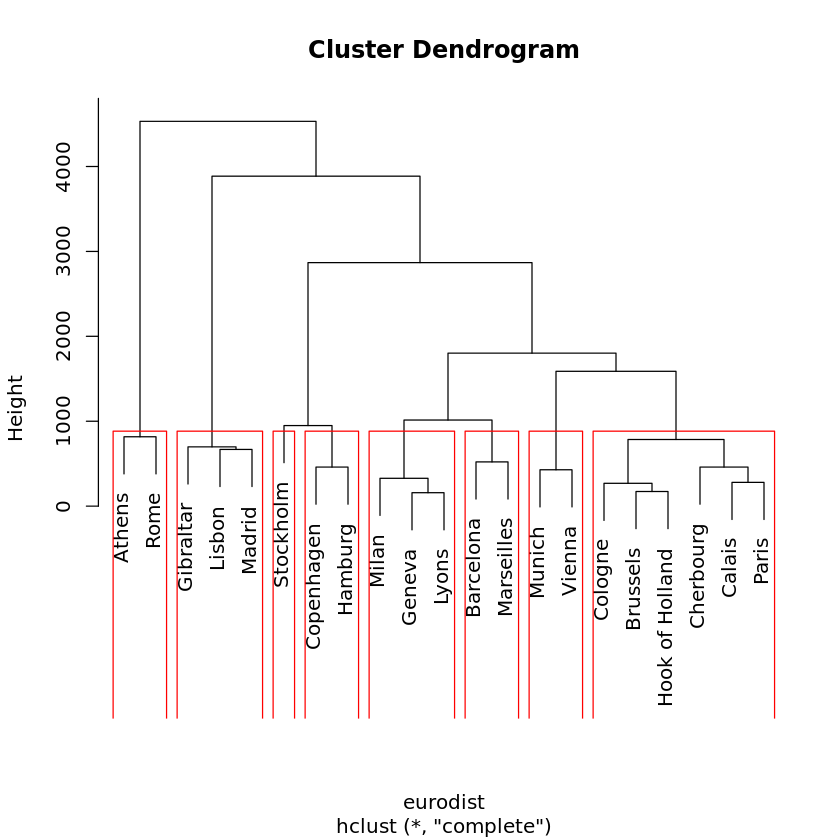

In [42]:
plot(eurotree)
rect.hclust(eurotree, k=8, border = "red")

### k-means clustering

In [43]:
kmeans.golub <- kmeans(golub, centers=4)

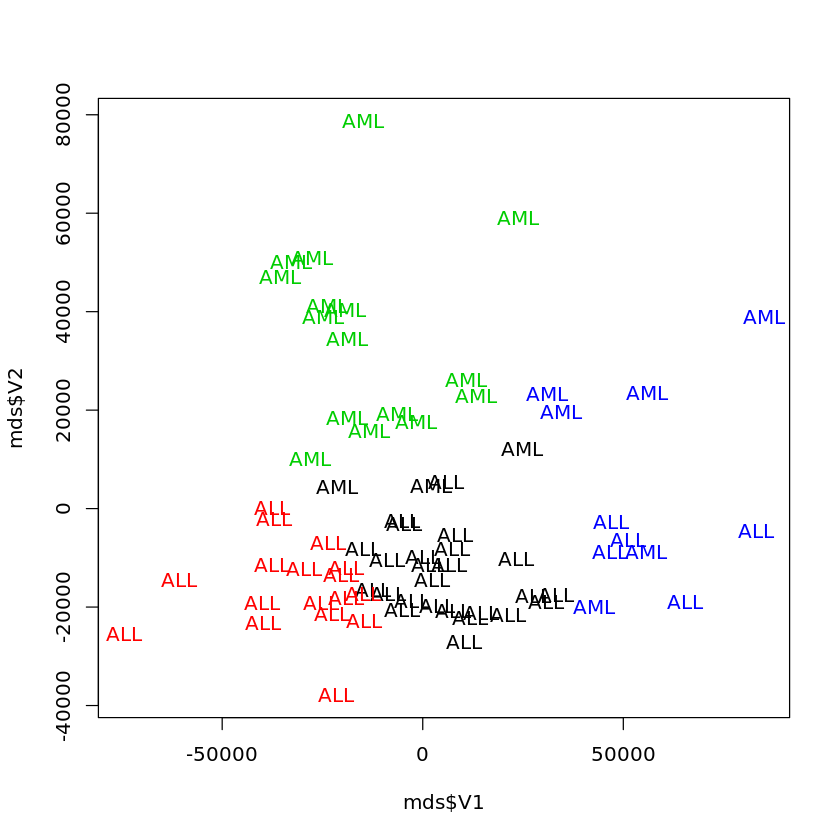

In [44]:
plot(mds$V1, mds$V2, type="n")
text(mds$V1, mds$V2, labels = mds$phenotype, col=as.integer(kmeans.golub$cluster))

#### Grouped by data source

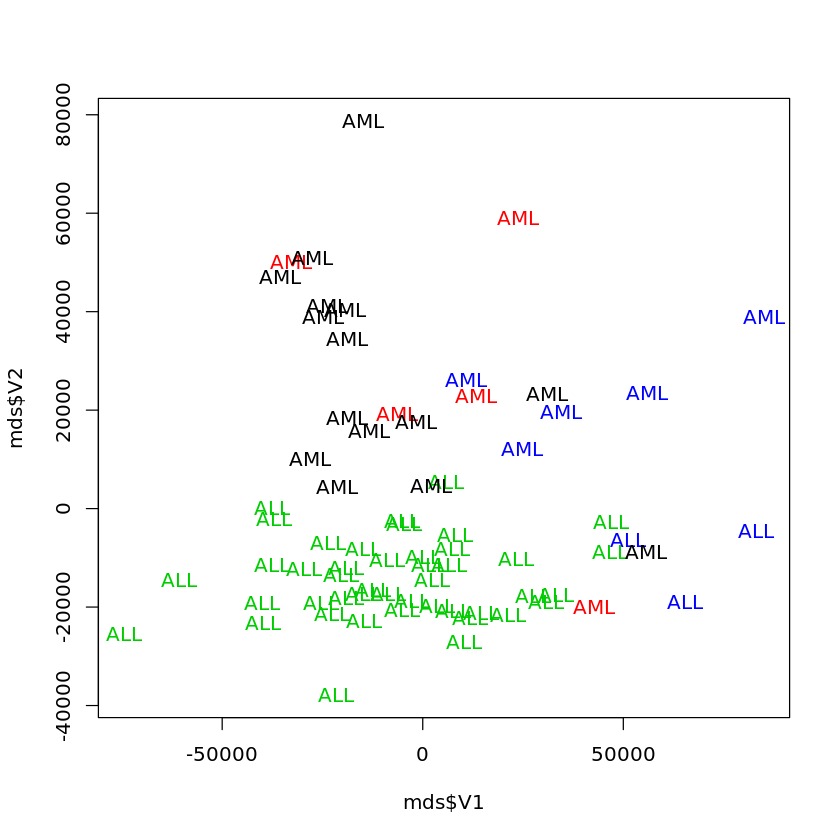

In [45]:
plot(mds$V1, mds$V2, type="n")
text(mds$V1, mds$V2, labels = mds$phenotype, 
     col=as.integer(Golub_Merge@phenoData@data$Source))

## Semi-supervised learning (Noise discovery)

In [46]:
suppressPackageStartupMessages(library(genefilter))
suppressPackageStartupMessages(library(pheatmap))

### Simulate noise data set

Note that EVERY expression value is drawn from a standard normal distribution. Hence there should not be any meaningful distinction between the "groups".

In [47]:
m <- 20000 # number of genes
n <- 20 # number of subjects
alpha <- 0.005

grp <- factor(rep(c('N', 'Y'), c(n, n)))
genes <- paste("Gene", 1:m, sep="")
subjects <- paste("PID", 1:(2*n), sep="")
expr <- matrix(rnorm(2 * n * m), m, 2 * n)
rownames(expr) <- genes
colnames(expr) <- subjects

#### Find genes that are different across group at specified significance level

In [48]:
pvals <- rowttests(expr, grp)$p.value

In [49]:
df <- data.frame(expr, pvals)

In [50]:
top.genes <- df %>% 
filter(pvals < alpha) %>%
select(-pvals) 

In [51]:
dim(top.genes)

[1] 108  40

#### Show heatmap and AHC clustering for top genes

In [52]:
annot <- data.frame(grp=grp, row.names=colnames(top.genes))

In [53]:
head(annot)

,grp
PID1,N
PID2,N
PID3,N
PID4,N
PID5,N
PID6,N


#### Simple version of heatmap

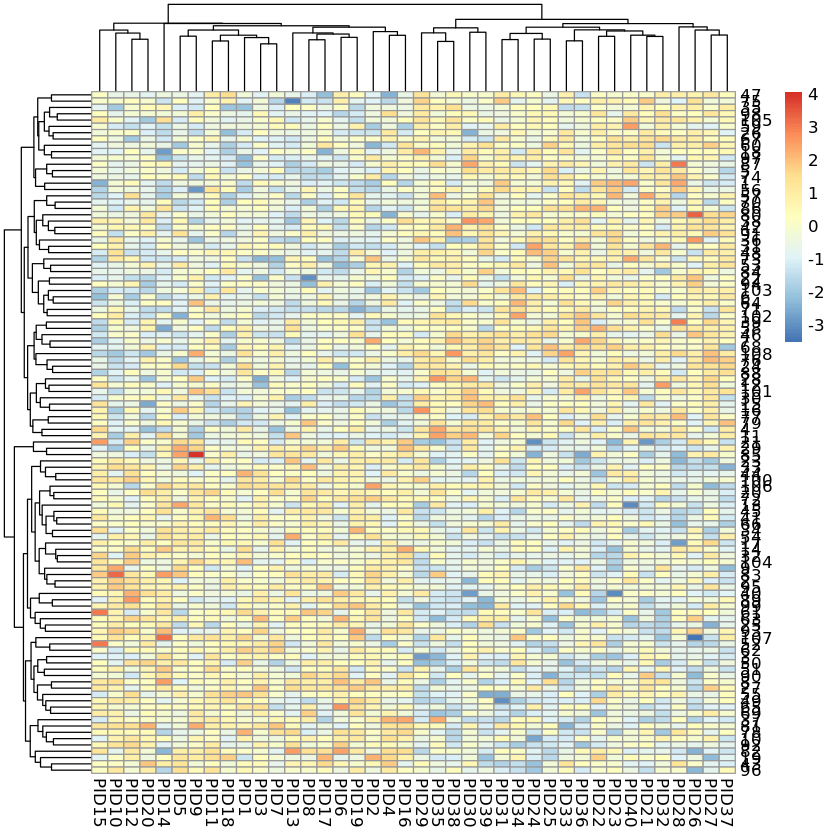

In [54]:
pheatmap(top.genes)

#### Fancy version of heatmap

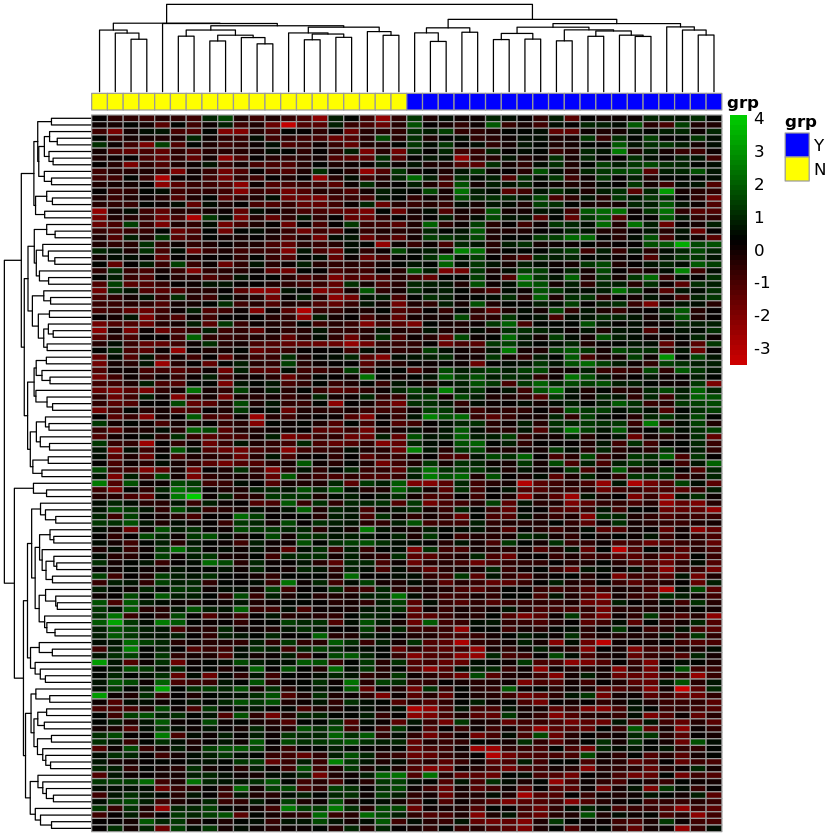

In [55]:
pheatmap(top.genes,
         annotation_col = annot,
         color = colorRampPalette(c("red3", "black", "green3"))(50),
         annotation_colors = list(grp = c(Y = "blue", N = "yellow")),
         show_rownames = FALSE, show_colnames = FALSE,
        )

### MDS of top genes

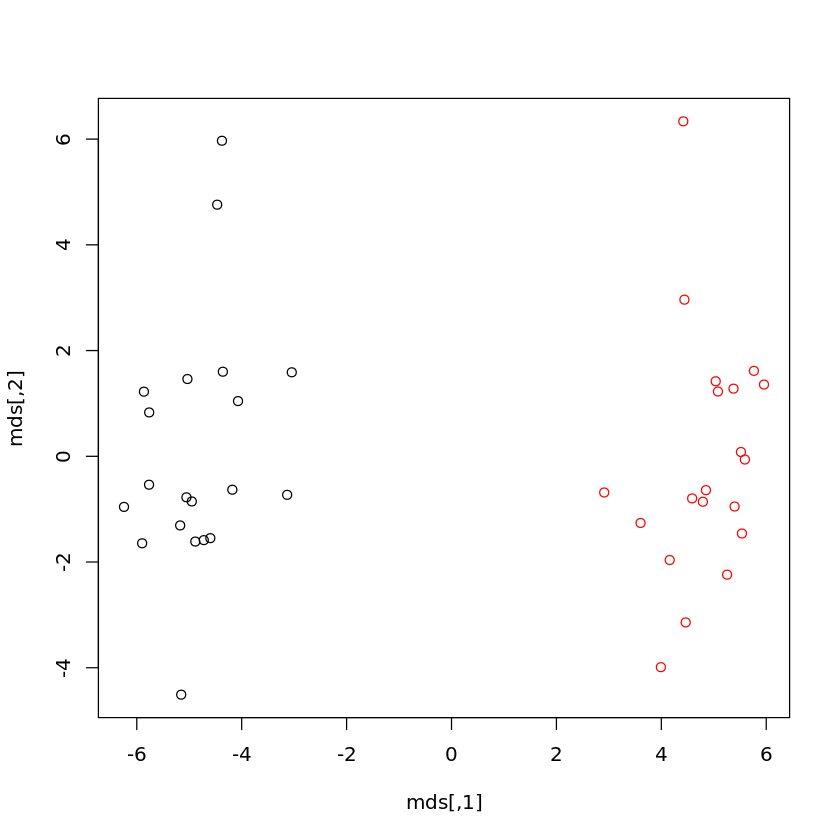

In [56]:
mds <- cmdscale(dist(t(top.genes)))
plot(mds, col=as.integer(grp))

**Exercise 1**

Load the `iris` data set. Each row has 4 features and a Species label. 

- Reduce the dimensionality of the features to 2 using each of the methods described above (PCA, MDS). 
- Plot scatter plots for each method, coloring by Species. 
- Are the Species separate in these dimensionality-reduced plots?

**Exercise 2**

Load the `iris` data set. Each row has 4 features and a Species label. 

- Scale the data to have zero mean and unit standard deviation
- Calculate a pairwise distance matrix (explore different distance measures)
- Perform hierarchical clustering (explore different linkage measures)
- Plot a dendrogram for the hierarchical clustering, showing 3 clusters (see the `rect.hclust` function)
- Create a scatter plot of the first two features colored by the cluster label (see teh `cutree` function)

**Exercise 3**

Load the `iris` data set. Each row has 4 features and a Species label. 

- Scale the data to have zero mean and unit standard deviation
- Perform k-means clustering using 2,3,4 and 10 clusters
- Create a scatter plot of the first two features colored by the cluster label for each cluster number 
- How could you assess how many clusters is appropriate?